In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Multiclass SVM for Wine Data

In [3]:
wine_data = np.load("/content/drive/My Drive/Colab Notebooks/datasets/wineData.npy")
wine_label = np.load("/content/drive/My Drive/Colab Notebooks/datasets/wineLabels.npy")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine_data, wine_label,
                                                    test_size=0.2,
                                                    random_state=42)

In [5]:
standardize = StandardScaler()
standardized_model = standardize.fit(x_train)
x_train_std = standardized_model.transform(x_train)
x_test_std = standardized_model.transform(x_test)

In [6]:
svm_obj = svm.SVC()
svm_model = svm_obj.fit(x_train_std, y_train)

In [7]:
pred_labels = svm_model.predict(x_test_std)
accuracy = svm_model.score(x_test_std, y_test)
print(f'Accuracy: {accuracy*100:0.4f}%')

Accuracy: 100.0000%


Text(0.02, 0.5, 'Feature dimension 1')

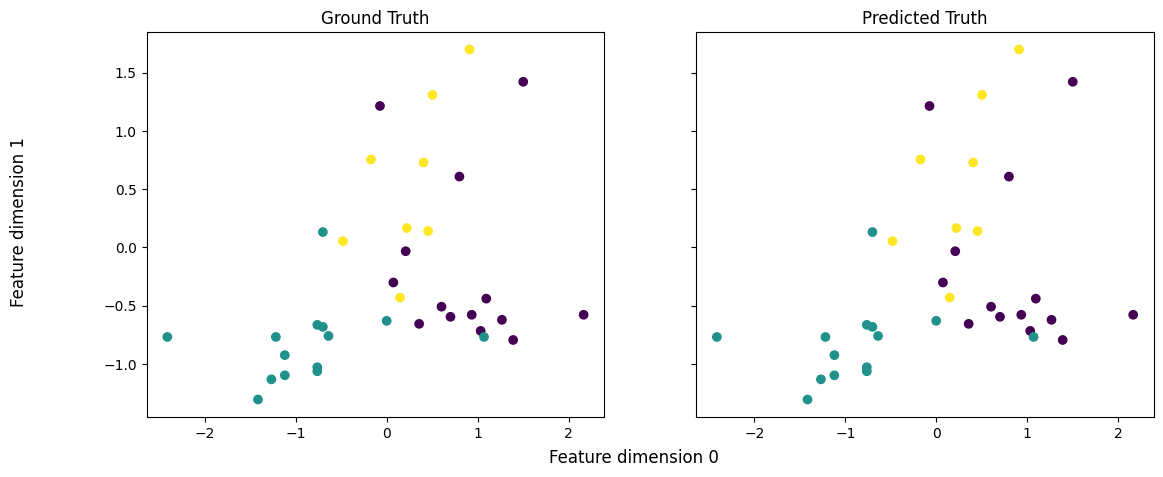

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharex=True, sharey=True)
ax[0].scatter(x_test_std[:, 0], x_test_std[:, 1], c=y_test)
ax[0].set_title("Ground Truth")
ax[1].scatter(x_test_std[:, 0], x_test_std[:, 1], c=pred_labels)
ax[1].set_title("Predicted Truth")
fig.supxlabel("Feature dimension 0")
fig.supylabel("Feature dimension 1")

### Neural Network for Wine Data

In [9]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy()
              )

In [11]:
# Stadardized data from Task 4.1
history = model.fit(x_train_std, y_train, epochs=150, validation_split=0.2, verbose=1)

Epoch 1/150
4/4 [==============================] - 5s 295ms/step - loss: 1.1935 - sparse_categorical_accuracy: 0.3451 - val_loss: 1.2626 - val_sparse_categorical_accuracy: 0.2069
Epoch 2/150
4/4 [==============================] - 0s 69ms/step - loss: 1.1703 - sparse_categorical_accuracy: 0.3274 - val_loss: 1.2464 - val_sparse_categorical_accuracy: 0.2069
Epoch 3/150
4/4 [==============================] - 0s 51ms/step - loss: 1.1514 - sparse_categorical_accuracy: 0.3363 - val_loss: 1.2316 - val_sparse_categorical_accuracy: 0.2069
Epoch 4/150
4/4 [==============================] - 0s 54ms/step - loss: 1.1344 - sparse_categorical_accuracy: 0.3097 - val_loss: 1.2195 - val_sparse_categorical_accuracy: 0.1724
Epoch 5/150
4/4 [==============================] - 0s 42ms/step - loss: 1.1194 - sparse_categorical_accuracy: 0.2920 - val_loss: 1.2067 - val_sparse_categorical_accuracy: 0.1379
Epoch 6/150
4/4 [==============================] - 0s 42ms/step - loss: 1.1053 - sparse_categorical_accuracy:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 56        
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
pred_labels_nn = model.predict(x_test_std)

2/2 [==============================] - 0s 6ms/step


Text(0.02, 0.5, 'Feature dimension 1')

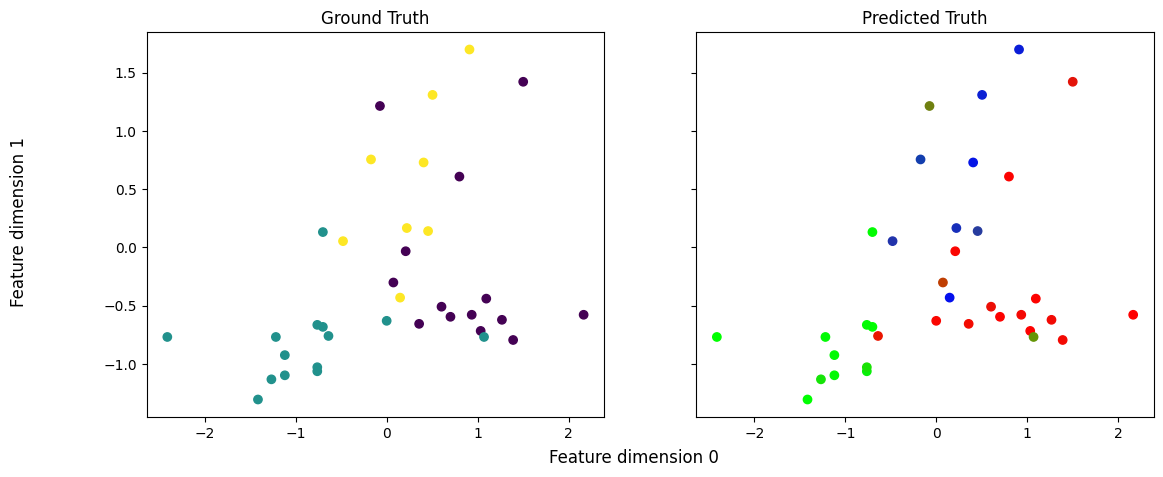

In [14]:
fig1, ax1 = plt.subplots(1, 2, figsize=(13, 5), sharex=True, sharey=True)
ax1[0].scatter(x_test_std[:, 0], x_test_std[:, 1], c=y_test)
ax1[0].set_title("Ground Truth")
ax1[1].scatter(x_test_std[:, 0], x_test_std[:, 1], c=pred_labels_nn)
ax1[1].set_title("Predicted Truth")
fig1.supxlabel("Feature dimension 0")
fig1.supylabel("Feature dimension 1")

Text(0.5, 1.0, 'Loss Curves')

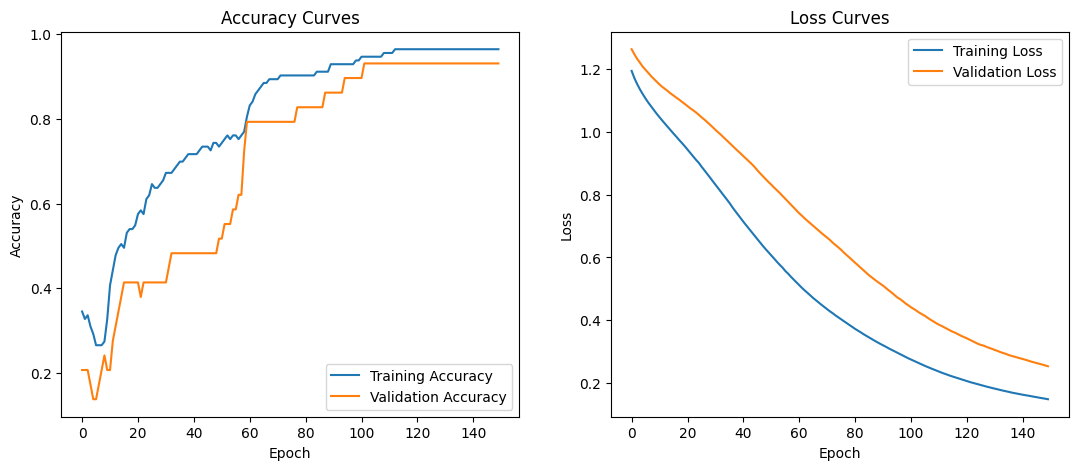

In [15]:
fig2, ax2 = plt.subplots(1, 2, figsize=(13, 5))

ax2[0].plot(history.history['sparse_categorical_accuracy'])
ax2[0].plot(history.history['val_sparse_categorical_accuracy'])
ax2[0].set_xlabel('Epoch')
ax2[0].set_ylabel('Accuracy')
ax2[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
ax2[0].set_title('Accuracy Curves')

ax2[1].plot(history.history['loss'])
ax2[1].plot(history.history['val_loss'])

ax2[1].set_xlabel('Epoch')
ax2[1].set_ylabel('Loss')
ax2[1].legend(['Training Loss', 'Validation Loss'])
ax2[1].set_title('Loss Curves')

In [16]:
results = model.evaluate(x_test_std, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 8ms/step - loss: 0.3078 - sparse_categorical_accuracy: 0.9167
Test set loss: 0.31, test set accuracy: 91.67%


### Neural Network for Digit Recognition

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [18]:
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


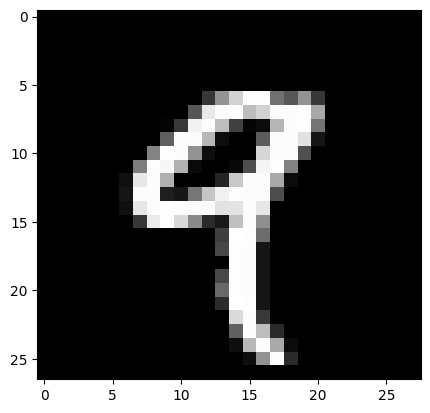

In [19]:
plt.imshow(x_train[4, 1:], cmap='gray')

In [20]:
x_trainf=x_train.reshape(60000,784)
x_testf=x_test.reshape(10000,784)
print(x_trainf.shape)
print(x_testf.shape)

(60000, 784)
(10000, 784)


In [21]:
x_trainf = x_trainf/255
x_testf  = x_testf/255

In [22]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [24]:
history = model.fit(x_trainf, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 1.8146 - sparse_categorical_accuracy: 0.3477 - val_loss: 1.1730 - val_sparse_categorical_accuracy: 0.6288
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8676 - sparse_categorical_accuracy: 0.7208 - val_loss: 0.6658 - val_sparse_categorical_accuracy: 0.7931
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6404 - sparse_categorical_accuracy: 0.8022 - val_loss: 0.5711 - val_sparse_categorical_accuracy: 0.8225
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5792 - sparse_categorical_accuracy: 0.8230 - val_loss: 0.5289 - val_sparse_categorical_accuracy: 0.8388
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5457 - sparse_categorical_accuracy: 0.8371 - val_loss: 0.5138 - val_sparse_categorical_accuracy: 0.8456
Epoch 6/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5220 -

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 4)                   3140      
                                                                 
 dense_4 (Dense)             (32, 50)                  250       
                                                                 
 dense_5 (Dense)             (32, 10)                  510       
                                                                 
Total params: 3900 (15.23 KB)
Trainable params: 3900 (15.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
results = model.evaluate(x_testf, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8856
Test set loss: 0.37, test set accuracy: 88.56%


Text(0.5, 1.0, 'Loss Curves')

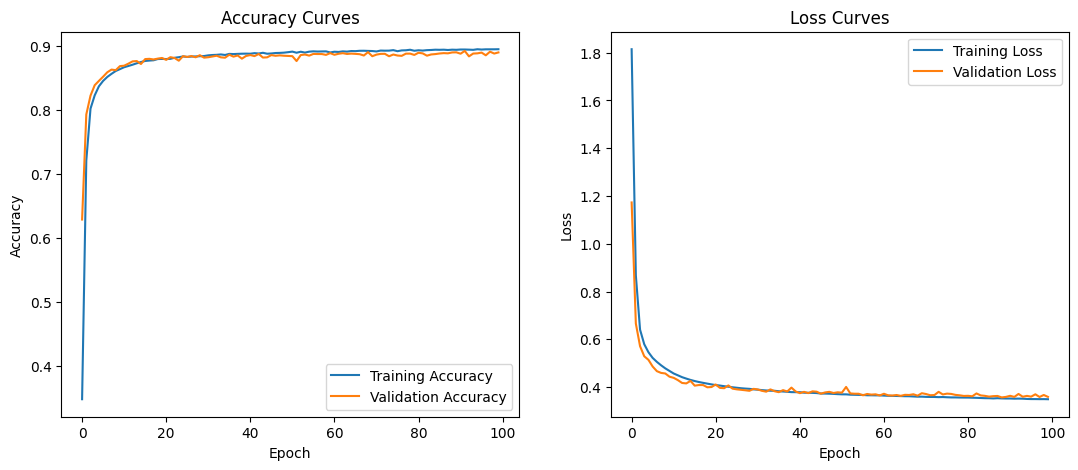

In [27]:
fig3, ax3 = plt.subplots(1, 2, figsize=(13, 5))

ax3[0].plot(history.history['sparse_categorical_accuracy'])
ax3[0].plot(history.history['val_sparse_categorical_accuracy'])
ax3[0].set_xlabel('Epoch')
ax3[0].set_ylabel('Accuracy')
ax3[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
ax3[0].set_title('Accuracy Curves')

ax3[1].plot(history.history['loss'])
ax3[1].plot(history.history['val_loss'])

ax3[1].set_xlabel('Epoch')
ax3[1].set_ylabel('Loss')
ax3[1].legend(['Training Loss', 'Validation Loss'])
ax3[1].set_title('Loss Curves')

### Convolutional Neural Network for Digit Recognition

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [31]:
number_of_classes = len(np.unique(y_train))
print(f'Number of Classes: {number_of_classes}')

Number of Classes: 10


In [32]:
model = keras.Sequential([ keras.Input(shape=(28, 28, 1)),
                          layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                           layers.MaxPooling2D(pool_size=(2, 2)),
                           layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                           layers.MaxPooling2D(pool_size=(2, 2)),
                           layers.Flatten(),
                           layers.Dropout(0.5),
                           layers.Dense(number_of_classes, activation="softmax"),
                           ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [33]:
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

In [34]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 6s 7ms/step - loss: 0.3850 - accuracy: 0.8834 - val_loss: 0.0983 - val_accuracy: 0.9727
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1167 - accuracy: 0.9647 - val_loss: 0.0668 - val_accuracy: 0.9811
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0883 - accuracy: 0.9726 - val_loss: 0.0547 - val_accuracy: 0.9844
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 0.0487 - val_accuracy: 0.9862
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0375 - val_accuracy: 0.9882
Epoch 

In [36]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]*100:0.4f}%')

Test accuracy: 99.1200%


Text(0.5, 1.0, 'Loss Curves')

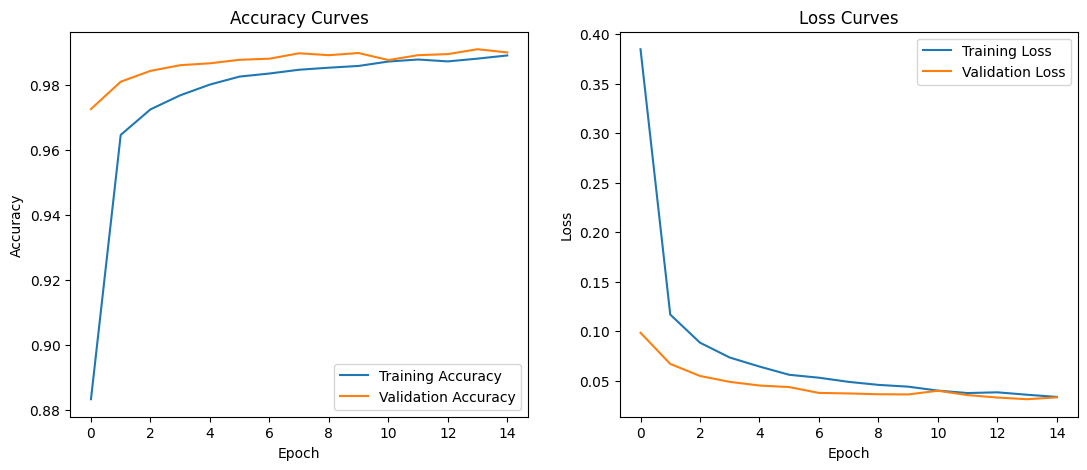

In [37]:
fig4, ax4 = plt.subplots(1, 2, figsize=(13, 5))

ax4[0].plot(history.history['accuracy'])
ax4[0].plot(history.history['val_accuracy'])
ax4[0].set_xlabel('Epoch')
ax4[0].set_ylabel('Accuracy')
ax4[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
ax4[0].set_title('Accuracy Curves')

ax4[1].plot(history.history['loss'])
ax4[1].plot(history.history['val_loss'])

ax4[1].set_xlabel('Epoch')
ax4[1].set_ylabel('Loss')
ax4[1].legend(['Training Loss', 'Validation Loss'])
ax4[1].set_title('Loss Curves')